In [10]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.

In [11]:
from differential_evolution import differential_evolution

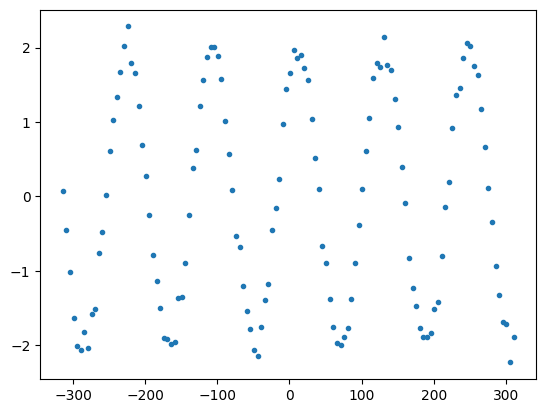

In [12]:
df = pandas.read_csv('../Evolutionary Programming/datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X, Y, '.')
plt.show()

In [13]:
def objective_function(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    return np.sum(np.abs(Y - Yp))
def draw_solution(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()

bounds = [
    [-100, 100],
    [-100, 100],
    [-100, 100]
]

In [14]:
r = differential_evolution(objective_function, bounds, 250, 0.5, 100, (X, Y))
r

161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.4462661406533
161.446266

{'P': array([  -2.61919079, -116.92205754,  -17.00752787]),
 'nIt': 100,
 'fun': 75.04485376233264,
 'nFev': 25250}

75.04485376233264


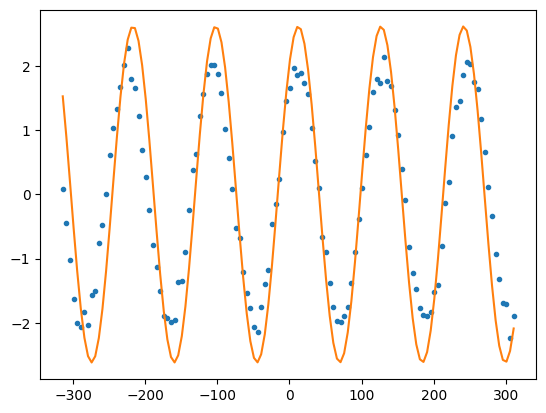

In [15]:
P = r['P']
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

In [16]:
from scipy.optimize import differential_evolution

In [17]:
res = differential_evolution(objective_function, bounds, args = (X, Y))
res

     fun: 10.660439460421724
 message: 'Optimization terminated successfully.'
    nfev: 13359
     nit: 294
 success: True
       x: array([ 1.99201625, 20.05306862, 13.30924322])

10.660439460421724


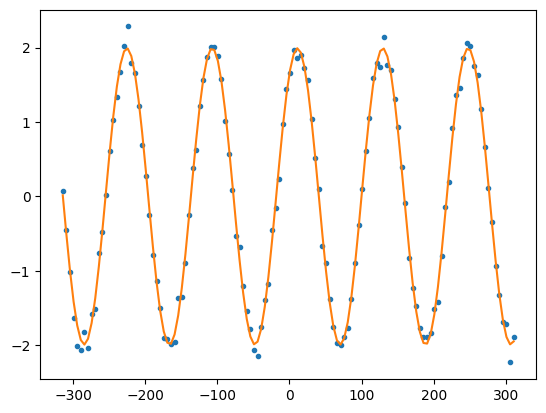

In [18]:
P = res.x
print(objective_function(P, X, Y))
draw_solution(P, X, Y)